In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from irma_dataset import *

In [15]:
dataset = Irma(root="../../data/IRMA/irma-xray-dataset")
dataset.load()

In [16]:
dataset.df.head()

,image_id,irma_code,05_class,05_irma_code_submask,06_class,06_irma_code,07_irma_code,08_irma_code,Path,Technical Code,Imaging Modality,Directional Code,Imaging Orientation,Anatomical Code,Body Region
0,1877,1121117720452,52,11-1-72-4,\N,\N,\N,1121-117-720-452,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,112,x-ray,111,111,772,abdomen
1,1879,1121117720452,52,11-1-72-4,\N,\N,\N,1121-117-720-452,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,112,x-ray,111,111,772,abdomen
2,1880,1121127700500,51,11-1-70-5,94,1121-127-700-500,1121-127-700-500,1121-127-700-500,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,112,x-ray,112,112,770,abdomen
3,1882,1121115710400,46,11-1-71-4,64,1121-115-710-400,1121-115-710-400,1121-115-710-400,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,112,x-ray,111,111,571,chest
4,1883,1121115700400,17,11-1-70-4,14,1121-115-700-400,1121-115-700-400,1121-115-700-400,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,112,x-ray,111,111,570,chest


In [17]:
dataset.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12677 entries, 0 to 12676
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   image_id              12677 non-null  int64 
 1   irma_code             12677 non-null  object
 2   05_class              12677 non-null  object
 3   05_irma_code_submask  12677 non-null  object
 4   06_class              12677 non-null  object
 5   06_irma_code          12677 non-null  object
 6   07_irma_code          12677 non-null  object
 7   08_irma_code          12677 non-null  object
 8   Path                  12677 non-null  object
 9   Technical Code        12677 non-null  object
 10  Imaging Modality      12677 non-null  object
 11  Directional Code      12677 non-null  object
 12  Imaging Orientation   12677 non-null  object
 13  Anatomical Code       12677 non-null  object
 14  Body Region           12677 non-null  object
dtypes: int64(1), object(14)
memory usage

In [18]:
dataset.df.isnull().sum()

image_id                0
irma_code               0
05_class                0
05_irma_code_submask    0
06_class                0
06_irma_code            0
07_irma_code            0
08_irma_code            0
Path                    0
Technical Code          0
Imaging Modality        0
Directional Code        0
Imaging Orientation     0
Anatomical Code         0
Body Region             0
dtype: int64

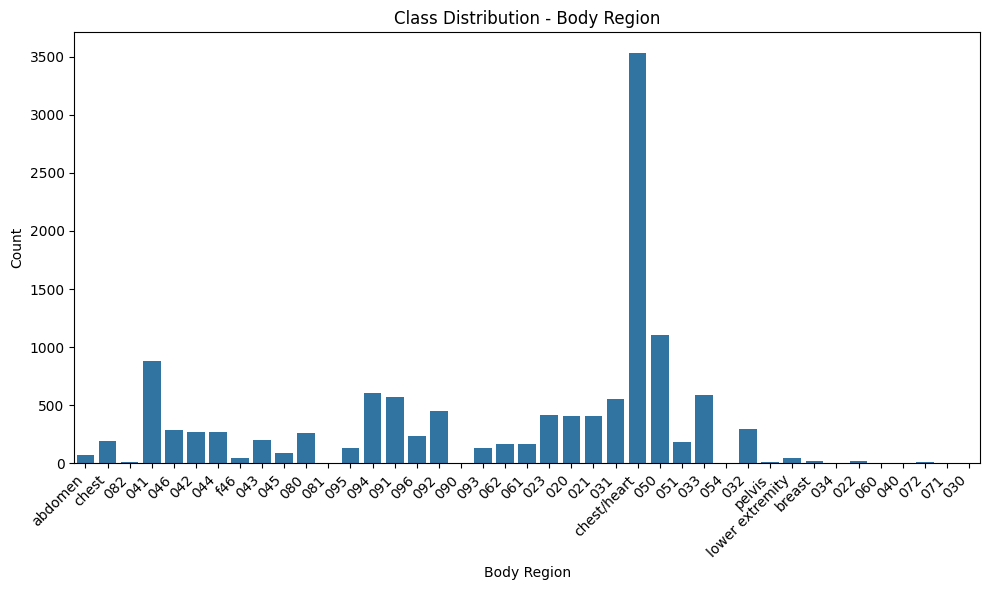

In [19]:
# Class distribution with rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x="Body Region", data=dataset.df)
plt.title("Class Distribution - Body Region")
plt.xlabel("Body Region")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

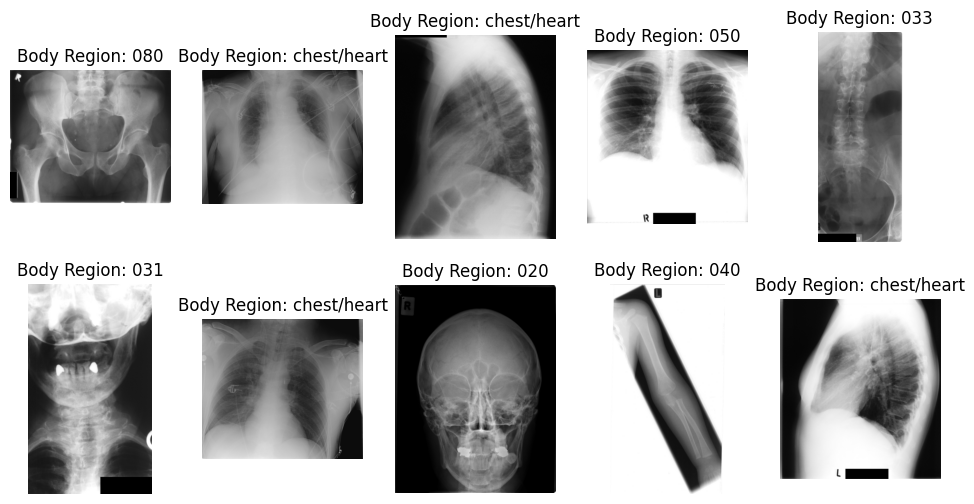

In [20]:
# Sample images
def show_sample_images(selection, num_samples=10):
    sample_images = selection.sample(num_samples)
    plt.figure(figsize=(12, 6))
    for i, (_, row) in enumerate(sample_images.iterrows(), 1):
        img = dataset.load_image(row["Path"])
        plt.subplot(2, int(num_samples/2), i)
        plt.imshow(img)
        plt.title(f"Body Region: {row['Body Region']}")
        plt.axis("off")
    plt.show()

show_sample_images(dataset.df)

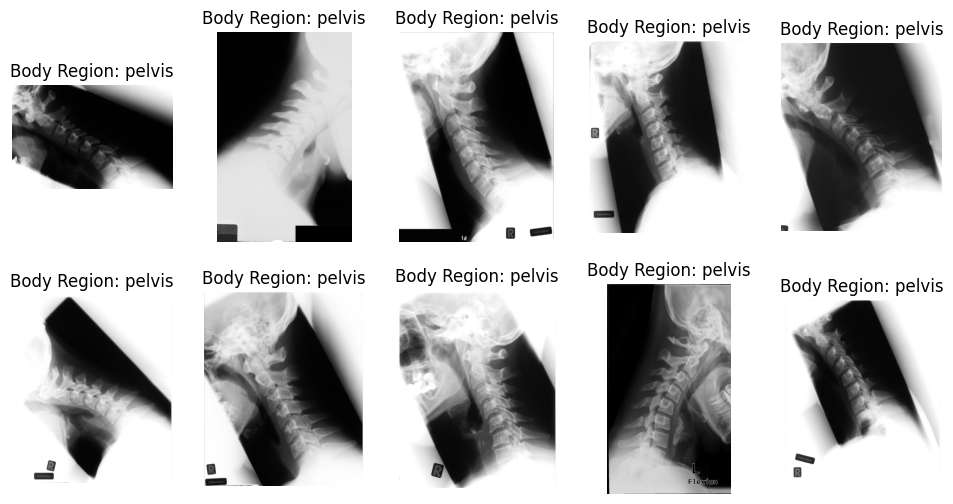

In [21]:
#body_region = "lower extremity"
#body_region = "breast"
body_region = "pelvis"

filtered_dataset = dataset.df[dataset.df["Body Region"] == body_region]

show_sample_images(filtered_dataset)